In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
alucar = pd.read_csv('Series/alucar.csv')

In [3]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
print('linhas',alucar.shape[0])
print('colunas',alucar.shape[1])
print('estatisticas',alucar.describe())

linhas 24
colunas 2
estatisticas            vendas
count   24.000000
mean   287.875000
std    222.151204
min     10.000000
25%     96.000000
50%    245.500000
75%    450.750000
max    721.000000


In [5]:
print('qtd nulos',alucar.isna().sum().sum())

qtd nulos 0


In [6]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

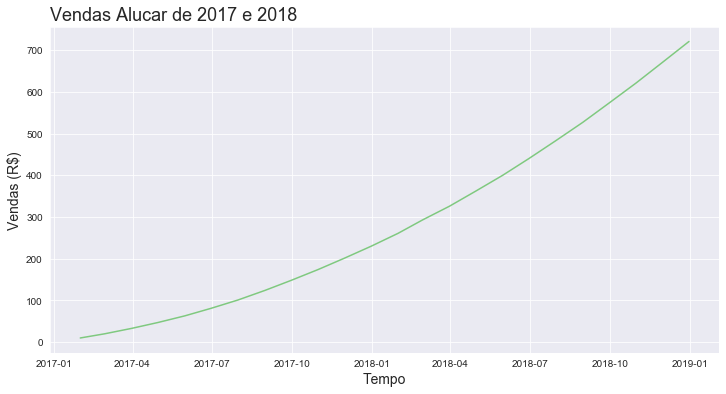

In [10]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax=ax

In [12]:
alucar['aumento'] = alucar['vendas'].diff()

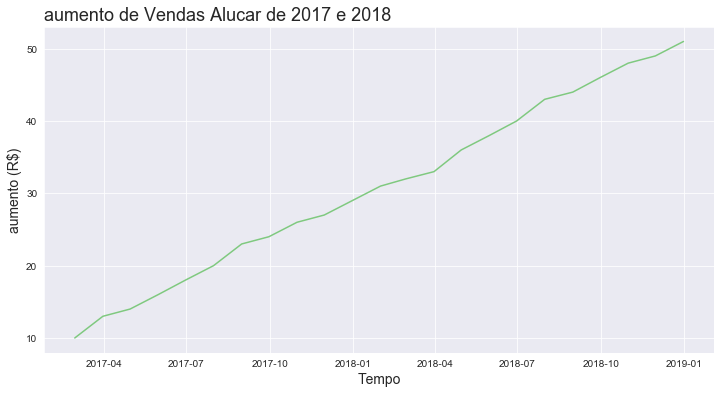

In [17]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('aumento de Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('aumento (R$)', fontsize=14)
ax=ax

In [18]:
def plotar(name,titlex,titley,x,y,dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(name, loc='left', fontsize=18)
    ax.set_xlabel(titlex, fontsize=14)
    ax.set_ylabel(titley, fontsize=14)
    ax=ax

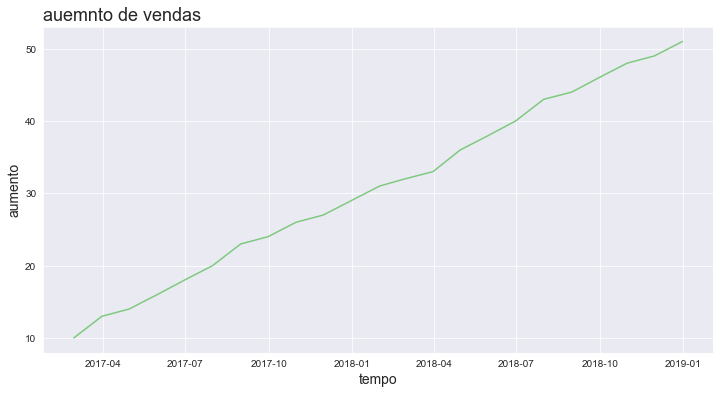

In [19]:
plotar("auemnto de vendas",'tempo','aumento','mes','aumento',alucar)

In [22]:
alucar['aceleracao'] = alucar['aumento'].diff()

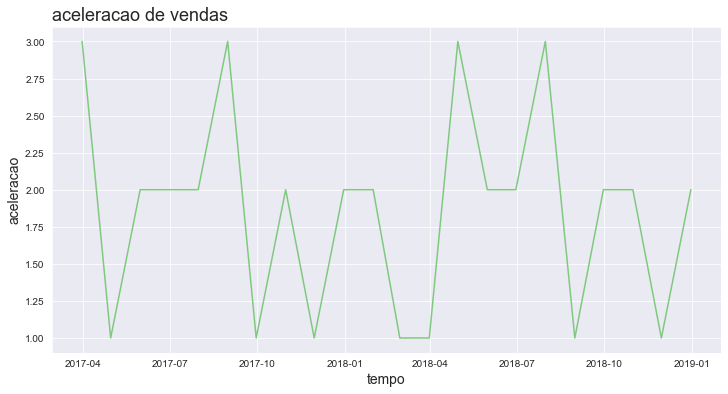

In [23]:
plotar("aceleracao de vendas",'tempo','aceleracao','mes','aceleracao',alucar)

In [31]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18,loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

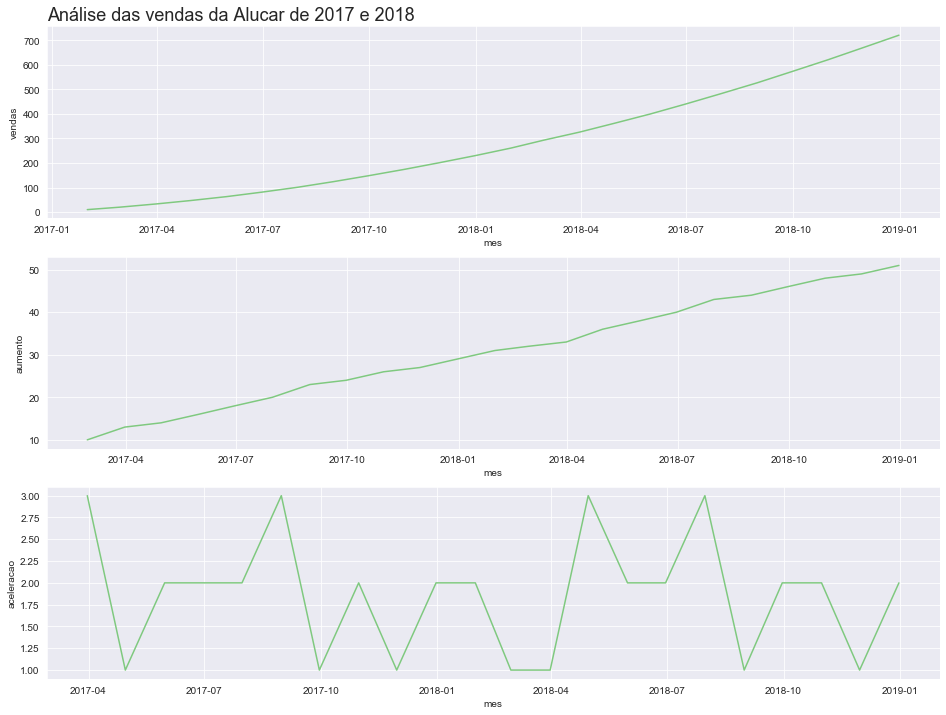

In [32]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
               alucar, 'Análise das vendas da Alucar de 2017 e 2018')

In [34]:
from pandas.plotting import autocorrelation_plot

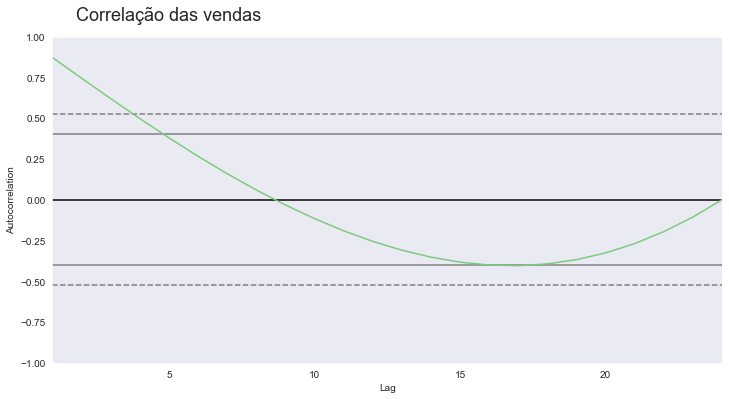

In [35]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

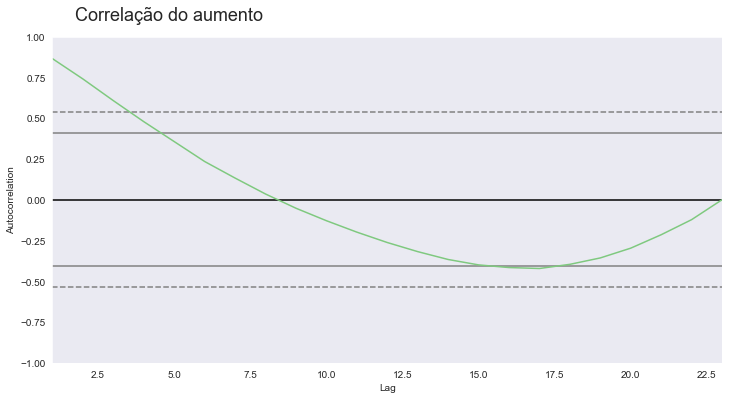

In [36]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

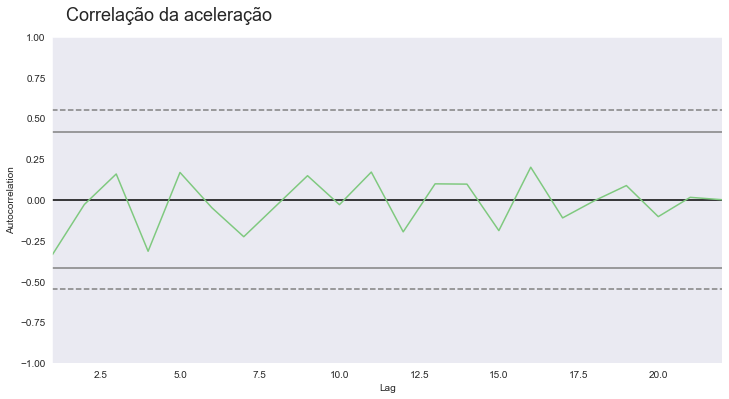

In [37]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax